In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]

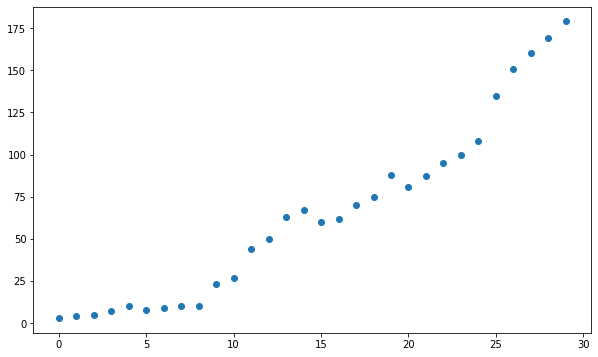

In [155]:
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.show()

In [156]:
# step1: Determining the degree of the polynomial
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [157]:
# step2: Creating the new features
# poly.fit(x.reshape(-1, 1))
# poly.transform(x.reshape(-1, 1))
poly_features = poly.fit_transform(x.reshape(-1, 1))
poly_features

array([[  0.,   0.],
       [  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.],
       [  5.,  25.],
       [  6.,  36.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.],
       [ 11., 121.],
       [ 12., 144.],
       [ 13., 169.],
       [ 14., 196.],
       [ 15., 225.],
       [ 16., 256.],
       [ 17., 289.],
       [ 18., 324.],
       [ 19., 361.],
       [ 20., 400.],
       [ 21., 441.],
       [ 22., 484.],
       [ 23., 529.],
       [ 24., 576.],
       [ 25., 625.],
       [ 26., 676.],
       [ 27., 729.],
       [ 28., 784.],
       [ 29., 841.]])

In [158]:
# step3: Creating the polynomial regression model
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
poly_reg_model.fit(poly_features, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [160]:
y_predicted = poly_reg_model.predict(poly_features)
y_predicted

array([  1.70806452,   3.04187987,   4.70292388,   6.69119657,
         9.00669792,  11.64942794,  14.61938662,  17.91657397,
        21.54098999,  25.49263467,  29.77150802,  34.37761004,
        39.31094073,  44.57150008,  50.1592881 ,  56.07430478,
        62.31655014,  68.88602415,  75.78272684,  83.00665819,
        90.55781821,  98.4362069 , 106.64182425, 115.17467027,
       124.03474495, 133.22204831, 142.73658033, 152.57834101,
       162.74733037, 173.24354839])

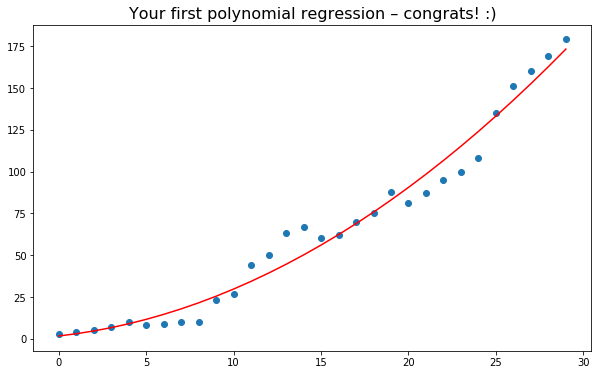

In [161]:
plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()

# 一元二次方程式
$$y = C_0*X + C_1*X^2 + B$$

In [162]:
# 印出方程式係數
poly_reg_model.coef_

array([1.17020102, 0.16361433])

In [163]:
# 印出方程式偏移bais
poly_reg_model.intercept_

1.7080645161290136

In [164]:
# 驗算最後一個數值
1.17020102*29 + 0.16361433*29*29 + 1.7080645161290136

173.24354562612902

In [123]:
np.random.seed(1)
x_1 = np.absolute(np.random.randn(100, 1) * 10)
x_2 = np.absolute(np.random.randn(100, 1) * 30)
y = 2*x_1**2 + 3*x_2 + 2 + np.random.randn(100, 1)*20

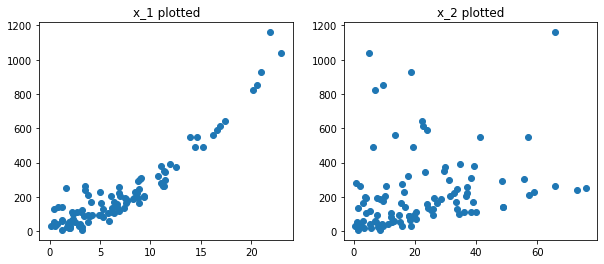

In [124]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(x_1, y)
axes[1].scatter(x_2, y)
axes[0].set_title("x_1 plotted")
axes[1].set_title("x_2 plotted")
plt.show()

In [125]:
# step1: Storing the variables in a dataframe
df = pd.DataFrame({"x_1":x_1.reshape(100,), "x_2":x_2.reshape(100,), "y":y.reshape(100,)}, index=range(0,100))
df

,x_1,x_2,y
0,16.243454,13.413857,561.923579
1,6.117564,36.735231,203.534988
2,5.281718,12.104749,82.861219
3,10.729686,17.807356,324.771961
4,8.654076,32.847355,223.689106
...,...,...,...
95,0.773401,48.823150,143.718510
96,3.438537,18.069578,88.201845
97,0.435969,12.608466,55.900949
98,6.200008,24.328550,132.757355


In [126]:
# step2: Defining the training and the test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
X, y = df[["x_1", "x_2"]], df["y"]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [127]:
poly_features.shape

(100, 5)

In [128]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70, 5) (30, 5) (70,) (30,)


In [129]:
poly_features

array([[1.62434536e+01, 1.34138569e+01, 2.63849786e+02, 2.17887363e+02,
        1.79931558e+02],
       [6.11756414e+00, 3.67352311e+01, 3.74245910e+01, 2.24730133e+02,
        1.34947721e+03],
       [5.28171752e+00, 1.21047493e+01, 2.78965400e+01, 6.39338662e+01,
        1.46524954e+02],
       [1.07296862e+01, 1.78073557e+01, 1.15126166e+02, 1.91067339e+02,
        3.17101917e+02],
       [8.65407629e+00, 3.28473554e+01, 7.48930365e+01, 2.84263519e+02,
        1.07894875e+03],
       [2.30153870e+01, 5.08147299e+00, 5.29708037e+02, 1.16952067e+02,
        2.58213678e+01],
       [1.74481176e+01, 2.22166935e+01, 3.04436809e+02, 3.87639482e+02,
        4.93581472e+02],
       [7.61206901e+00, 2.86110181e+01, 5.79435946e+01, 2.17789044e+02,
        8.18590354e+02],
       [3.19039096e+00, 7.98655518e+00, 1.01785945e+01, 2.54802335e+01,
        6.37850636e+01],
       [2.49370375e+00, 9.78436401e-01, 6.21855842e+00, 2.43993053e+00,
        9.57337790e-01],
       [1.46210794e+01, 4.1193

In [130]:
df = pd.DataFrame({"x_1":range(100), "x_2":range(0,200,2)})
df

,x_1,x_2
0,0,0
1,1,2
2,2,4
3,3,6
4,4,8
...,...,...
95,95,190
96,96,192
97,97,194
98,98,196


In [131]:
poly.fit(df)
df_features = poly.transform(df)
df_features

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00, 4.0000e+00],
       [2.0000e+00, 4.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01],
       [3.0000e+00, 6.0000e+00, 9.0000e+00, 1.8000e+01, 3.6000e+01],
       [4.0000e+00, 8.0000e+00, 1.6000e+01, 3.2000e+01, 6.4000e+01],
       [5.0000e+00, 1.0000e+01, 2.5000e+01, 5.0000e+01, 1.0000e+02],
       [6.0000e+00, 1.2000e+01, 3.6000e+01, 7.2000e+01, 1.4400e+02],
       [7.0000e+00, 1.4000e+01, 4.9000e+01, 9.8000e+01, 1.9600e+02],
       [8.0000e+00, 1.6000e+01, 6.4000e+01, 1.2800e+02, 2.5600e+02],
       [9.0000e+00, 1.8000e+01, 8.1000e+01, 1.6200e+02, 3.2400e+02],
       [1.0000e+01, 2.0000e+01, 1.0000e+02, 2.0000e+02, 4.0000e+02],
       [1.1000e+01, 2.2000e+01, 1.2100e+02, 2.4200e+02, 4.8400e+02],
       [1.2000e+01, 2.4000e+01, 1.4400e+02, 2.8800e+02, 5.7600e+02],
       [1.3000e+01, 2.6000e+01, 1.6900e+02, 3.3800e+02, 6.7600e+02],
       [1.4000e+01, 2.8000e+01, 1.

In [132]:
# step3: Creating a polynomial regression model
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

20.937707839078723

In [134]:
poly_reg_model.coef_

array([0.61945509, 1.9140045 , 1.89905813, 0.0207338 , 0.01300394])

## 二元二次多項式 : 
$$Y, X_1, X_2$$
## 數學模型 : 
$$\hat Y = C_0 + C_1*X_1 + C_2*X_2 + C_{11}*X_1^2 + C_{22}*X_2^2 + C_{12}*X_1*X_2$$
### 令$$X_3 = X_1^2, X_4 = X_2^2, X_5 = X_1*X_2, C_3 = C_{11}, C_4 = C_{22}, C_5 = C_{12}$$
### 得$$\hat Y = C_0 + C_1*X_1 + C_2*X_2 + C_3*X_3 + C_4*X_4 + C_5*X_5$$

In [135]:
poly_reg_model.coef_

array([0.61945509, 1.9140045 , 1.89905813, 0.0207338 , 0.01300394])

In [136]:
poly_features[0,:]

array([ 16.24345364,  13.41385694, 263.84978605, 217.88736335,
       179.9315581 ])

In [146]:
0.61945509*16.24345364 + 1.9140045*13.41385694 + 1.89905813*16.24345364*16.24345364 + 0.0207338*13.41385694*13.41385694 + 0.01300394*16.24345364*13.41385694

543.366413215096

In [141]:
poly_reg_y_predicted

array([145.72381131, 225.76917402, 466.96591793, 103.80051687,
        48.77859004, 126.20203282, 273.34728664, 118.6707899 ,
       542.55240214, 557.78324219,  94.1278756 , 120.80778896,
       181.69146017, 193.07613292, 385.55902084, 244.50491225,
       133.56214539, 168.38378408,  94.52513116,  86.91097432,
        89.34275735,  34.94676793, 143.46232397, 187.53120857,
       560.57877439, 355.16135962,  33.64333707,  78.82645348,
        29.4133473 , 242.48638268])

In [144]:
y_test

83    170.447801
53    261.986812
70    494.035533
45    109.040030
44     32.941838
39    132.817561
22    310.387310
80    110.778015
10    546.602493
0     561.923579
18    131.434794
30    118.815135
73    195.609702
33    230.266054
90    390.179708
4     223.689106
76    111.765799
77    189.611171
12    121.232689
31     91.872132
55     58.947537
88      7.898541
26    140.593486
42    191.811028
69    548.047454
15    379.574446
40     16.187184
96     88.201845
9      56.494004
72    249.847800
Name: y, dtype: float64

In [104]:
# step4: Creating a linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))
lin_reg_rmse

62.302487453878534